# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [31]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2024-02-20 05:03:23--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat.2’

test.dat.2          100%[===================>]   2.78K  --.-KB/s    in 0s      

2024-02-20 05:03:23 (253 MB/s) - ‘test.dat.2’ saved [2844/2844]

--2024-02-20 05:03:23--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat.2’

train.dat.2         100%[===================>]  10.98K  --.-KB/s    in 0s      

2024-02-20 05:03:23 (218 MB/s) - ‘train.dat.2’ saved [11244/11244]



In [32]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [33]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    return sum(x * y for x, y in zip(array1, array2))



def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    return sigmoid(dot_product(weights, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0



# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    #intialize weights with 0s
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #perform the dot product and apply the sigmoid function
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            #Update weights using the perceptron learning rule
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [34]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




 The way output is calculated in train_perceptron differs from using sigmoid(in_value and predict($weights, for example.
 Using sigmoid(in_value) means that the perceptron model uses the sigmoid activation function to squash the dot product of the weights and the input instance into a value between 0 and 1.
 This is a typical case where the perceptron's output must be probabilistic, or when it has to be used as a binary classifier.
 predict(weights, instance) implies that the perceptron directly computes the dot product of the weights and the input instance without applying any activation function. T
 This is common when the perceptron is used for linear classification or regression.
 Using the sigmoid activation results in different weight values compared to direct prediction. The choice between them depends on the specific requirements and nature of the problem being solved.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [35]:
train_data = read_data("train.dat")
test_data = read_data("test.dat")
for percent in [5, 10, 25, 50, 75, 100]:
    for no_of_epochs in [5, 10, 20, 50, 100]:
        for learning_rate in [0.005, 0.01, 0.05]:
            size_of_data = int(len(train_data) * percent / 100)
            subset = train_data[:size_of_data]
            weights = train_perceptron(subset, learning_rate, no_of_epochs)
            accuracy = get_accuracy(weights, test_data)
            print(f"# tr: {percent:3d}, epochs: {no_of_epochs:3d}, learning rate: {learning_rate:.3f}; Accuracy (test, {len(test_data)} instances): {accuracy:.2f}")


# tr:   5, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances)

In [36]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 100

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [38]:

train_data= []
no_of_epochs_data = []
learning_rate_data = []
accuracy_data = []

for tr_percent in [5, 10, 25, 50, 75, 100]:
    for no_of_epochs in [5, 10, 20, 50, 100]:
        for learning_rate in [0.005, 0.01, 0.05]:
            training_data_size = int(len(instances_tr) * tr_percent / 100)
            training_subset = instances_tr[:size_of_data]
            weights = train_perceptron(training_subset, learning_rate, no_of_epochs)
            accuracy = get_accuracy(weights, instances_te)
            train_data.append(tr_percent)
            no_of_epochs_data.append(no_of_epochs)
            learning_rate_data.append(learning_rate)
            accuracy_data.append(accuracy)
            print(f"# tr: {tr_percent:3d}, epochs: {no_of_epochs:3d}, learning rate: {learning_rate:.3f}; Accuracy (test, {len(instances_te)} instances): {accuracy:.2f}")




# tr:   5, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 69.00
# tr:   5, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.00
# tr:   5, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 69.00
# tr:   5, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 76.00
# tr:   5, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 69.00
# tr:   5, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 70.00
# tr:   5, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 80.00
# tr:   5, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 73.00
# tr:   5, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 77.00
# tr:   5, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances)

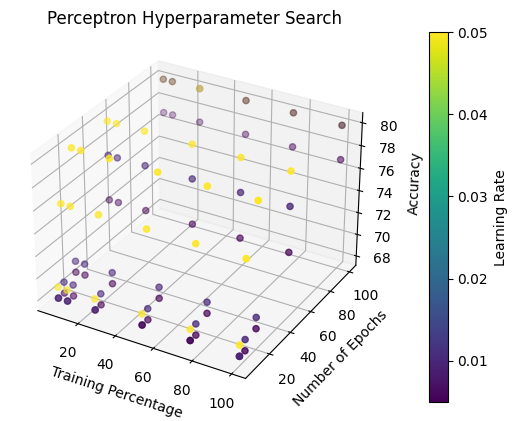

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(train_data, no_of_epochs_data, accuracy_data, c=learning_rate_data, cmap='viridis', marker='o')
ax.set_xlabel('Training Percentage')
ax.set_ylabel('Number of Epochs')
ax.set_zlabel('Accuracy')
ax.set_title('Perceptron Hyperparameter Search')
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Learning Rate')
plt.show()

**Explanations for results**

A. The results show that the highest accuracy with the test dataset is not always guaranteed by training with the entire training dataset of 100% of cases. Accuracy seems to have varied according to the various combinations of hyperparameters. This does not necessarily mean that an increase in the number of training data can lead to improved generalization performance. A significant role is also played by other factors, such as the choice of the learning rate and the number of epochs.

B. It is interesting to note that in some cases, the use of a smaller percentage of training data can result in higher accuracy compared to an even greater percentage. For example, 71.0% accuracy is obtained in a second run where the training rate is 100%. However, the accuracy is reduced to 68.0% with a 100% training percentage in the initial run. This indicates that when using a larger training dataset, overcompensation may occur leading to poorer generalization results on unseen data.



C.  With a perceptron model in this dataset, it seems difficult to achieve an accuracy of more than 80.0% despite attempts at various hyperparameter combinations. This could indicate that the data set may not be linear in nature, or that it is difficult for a model to capture complex patterns within those data sets. More advanced models or techniques for designing features might be needed to further enhance accuracy.


D.  The results also show that, in particular when other hyperparameters are fixed, increasing the number of epochs does not always lead to better accuracy. While training for more epochs allows the model to learn more complex patterns in the data, it also increases the risk of overfitting, in particular if the model's capacity is not sufficient or if the data is noisy.










